### Initialization

In [113]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii


# Definition of RM PDF , Lorentzian + 2 Gaussian functions

def RM_pdf_values(a,b,size,a1,a2,a3,gamma,sigma1,sigma2):
    class RM_pdf(st.rv_continuous):
        def _pdf(self,x):
            return (a3 * (1 / sigma2/np.sqrt(2*np.pi)* np.exp(-1/2*(x / sigma2)**2 ))
            +(a2) * (1 / sigma1/np.sqrt(2*np.pi)* np.exp(-1/2*(x / sigma1)**2 ))
            +(a1)*(1 / (np.pi*gamma) *((gamma**2) / (x**2 + gamma**2)))) 
    RM_cv = RM_pdf(a=a,b=b)
    RM = RM_cv.rvs(size=size)
    return RM

# Definition of DM PDF, lognormal
def DM_pdf_values(a,b,size,mu,sigma):
    class DM_pdf(st.rv_continuous):
        def _pdf(self,x):
            return 1/((x)*sigma * np.sqrt(2*np.pi))* np.exp(-(np.log(x)-mu)**2/(2*sigma**2))  
    DM_cv = DM_pdf(a=a,b=b)
    DM = DM_cv.rvs(size=size)
    return DM


# Curved powerlaw describing the redshift evolution of the parameters of the RM PDF 
def curved_powerlaw(x,a,b,c,d):
    y = a*x**(d+b*x)+c
    return y

# EXponential describing the redshift evolution of the parameters of the DM PDF
def exponential(x, a, b,c):
    return a*np.exp(-b*x)+c

### Change input parameters here

#### Choosing redshift and subset
Redshift: any number between 0 and 2

Possible subsets: All, SF (starforming), Q (quenched), 5 stellar mass bins, 4 inclination bins, 4 offset bins 

Stellar mass: 9 < log M*< 9.5, 9.5 < log M*< 10, 10 < log M*< 10.5, 10.5 < log M*< 11, 11 < log M*< 12

Inclination: i<10 , 10 < i < 45, 45 < i < 80, i > 80 

Projected offset: b_offset < 5 kpc, 5 kpc < b_offset < 10 kpc, 10 kpc < b_offset < 30 kpc , b_offset < 30 kpc

List: 'All', 'SF', 'Q', 'M1', 'M2', 'M3', 'M4', 'M5','i1', 'i2', 'i3', 'i4', 'offset1', 'offset2','offset3','offset4' (also see dict_keys when reading in Table B.2)


#### Choosing the number of values and limits of the PDF

lower_limit, upper_limit: the limits of the PDF on the x axis (rad m$^{-2}$ for RM and pc cm$^{-3}$ for DM)

dist_size: number of values drawn from distribution

step_size: bin size of plotted PDF (rad m$^{-2}$ for RM and pc cm$^{-3}$ for DM)

In [122]:
z = 2
subset = 'offset1'


lower_limit_RM = -1000
upper_limit_RM = 1000
dist_size_RM = 1000
bin_size_RM = 25


lower_limit_DM = 0
upper_limit_DM = 1000
dist_size_DM = 5000
bin_size_DM = 25

#### Reading in Table B.2 

In [115]:
data = ascii.read('PDF_params.txt')  
params = {'All': [], 'SF':[], 'Q': [], 'M1': [], 'M2': [], 'M3': [], 'M4': [], 'M5':[],
          'i1': [], 'i2': [], 'i3': [], 'i4': [], 'offset1': [], 'offset2': [],'offset3': [],'offset4': [] }
dict_keys = list(params.keys())
for i in range(len(dict_keys)):
    params[dict_keys[i]].append(data[i*8:i*8+8])

#### PDF parameter calculation
Calculates the parameters of the RM and DM PDFs at a given redshift for a given subset of galaxies

***Needs to be rerun for new redshift or subset***

In [116]:
# RM parameters

a1 = curved_powerlaw(z,params[subset][0][0]['A'],params[subset][0][0]['B'],params[subset][0][0]['C'],params[subset][0][0]['D'])
a2 = curved_powerlaw(z,params[subset][0][1]['A'],params[subset][0][1]['B'],params[subset][0][1]['C'],params[subset][0][1]['D'])
a3 = curved_powerlaw(z,params[subset][0][2]['A'],params[subset][0][2]['B'],params[subset][0][2]['C'],params[subset][0][2]['D'])
gamma = curved_powerlaw(z,params[subset][0][3]['A'],params[subset][0][3]['B'],params[subset][0][3]['C'],params[subset][0][3]['D'])
sigma1 = curved_powerlaw(z,params[subset][0][4]['A'],params[subset][0][4]['B'],params[subset][0][4]['C'],params[subset][0][4]['D'])
sigma2 = curved_powerlaw(z,params[subset][0][5]['A'],params[subset][0][5]['B'],params[subset][0][5]['C'],params[subset][0][5]['D'])

# DM parameters

mu = exponential(z,params[subset][0][6]['A'],params[subset][0][6]['B'],params[subset][0][6]['C'])
sigma = exponential(z,params[subset][0][7]['A'],params[subset][0][7]['B'],params[subset][0][7]['C'])

#### RM and DM PDFs

Defines the PDFs of the chosen subsample, draws values from it, and plots the resulting PDF

In [117]:
RM = RM_pdf_values(lower_limit_RM,upper_limit_RM,dist_size_RM,a1,a2,a3,gamma,sigma1,sigma2)

In [118]:
DM = DM_pdf_values(lower_limit_DM,upper_limit_DM,dist_size_DM,mu,sigma)

Text(0, 0.5, 'Normalized counts')

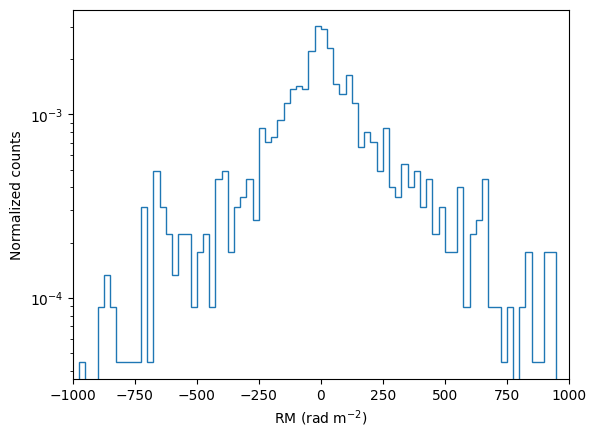

In [120]:
# Plot RM PDF

plt.hist(RM,histtype='step',density=True,bins=np.arange(lower_limit_RM,upper_limit_RM,bin_size_RM))
plt.yscale('log')
plt.xlim(lower_limit_RM,upper_limit_RM)
plt.xlabel(r'RM (rad m$^{-2}$)')
plt.ylabel('Normalized counts')

Text(0, 0.5, 'Normalized counts')

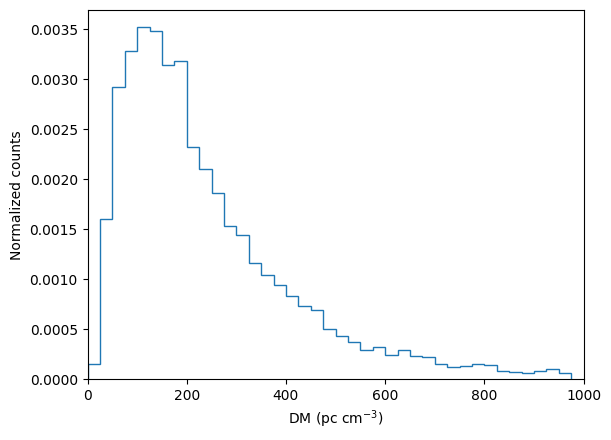

In [121]:
# Plot DM PDF
plt.hist(DM,histtype='step',density=True,bins=np.arange(lower_limit_DM,upper_limit_DM,bin_size_DM))
plt.xlim(lower_limit_DM,upper_limit_DM)
plt.xlabel(r'DM (pc cm$^{-3}$)')
plt.ylabel('Normalized counts')